# Lillian Jiang Project 4: Is the Sun a Thermal Radiator?

<div class="alert alert-block alert-success">
    
   - In project 3, we discovered that ideal thermal radiator and the stars in cluster RGC224 both have a relationship between color and temperature; however, the observational and theoretical relationships are not the same. The result has triggered two hypothesis: 
       - Stars are not ideal thermal radiators;
       - Stars do radiate like blackbodies and the difference in their color-brightness relations results from a systematic variation of stellar radius with brightness and color.
   - In this project, we aim to test the first hypothesis that whethere stats are ideal thermal radiators. One particular star, the sun, will be examined over a board range of wavelength in order to determine the statement.
   - The goal is to compare the solar spectrum to that of an ideal thermal radiator and decide if the Planck function is a good representation of the sun’s spectral energy distribution. We will evaluate the temperature of the sun in three different ways. If the sun is a perfect thermal radiator, all three will be the same.

## Import package

In [1]:
import numpy as np                       #numpy enables functions for data arrays
import matplotlib.pyplot as plt 
import math

## Import data

<div class="alert alert-block alert-success">
    
 - File sun.txt contains two data columns from the Sun.
 - The first column is wavelength from 200 to 4000 nm and the second is the corresponding specific intensity emitted by the sun in cgs units. Each intensity point represents the average intensity within a 10 nm band centered at the stated wavelength.

In [2]:
sun = np.loadtxt('sun.txt')
wavelength = sun[:,0]
intensity = sun[:,1]

## The solar spectrum compared to the Planck function

In [3]:
#The Planck Constant
h = 6.626 * 10**(-27)  #erg*sec
#The Boltzmann Constant
k = 1.381 * 10**(-16)  #erg/K
#Speed of light
c = 2.998 * 10**(10)   #cm/sec

# Temperature, in K
temp = np.arange(4000, 9000, 1000) 
# Wavelength array, in cm
wavelength_cm = wavelength * math.pow(10, -7)

<div class="alert alert-block alert-success">
    
- Because temp and wavelength_cm have different sizes, Meshgrid method turns the two 1-D arrays of different sizes into two 2-D arrays of identical sizes.

- Planck Function:
$  B(\lambda,T)~d{\lambda}~=~ {2 h c^2 \over \lambda^5}~ {1\over
\exp({h c \over \lambda k T}) -1}~~d{\lambda}$ , in unit $  erg*cm^{-2}*st^{-1} $
- $B(\lambda,T)$ is the intensity for a T temperatured thermal radiator at wavelength $\lambda$ 

In [4]:
Temp, Wave = np.meshgrid(temp,wavelength_cm) 

calc_top = 2*h*c**2
expo = (h*c)/(Wave*k*Temp)
calc_bot = (Wave**5)*(np.exp(expo)-1)
planck_result = calc_top/calc_bot

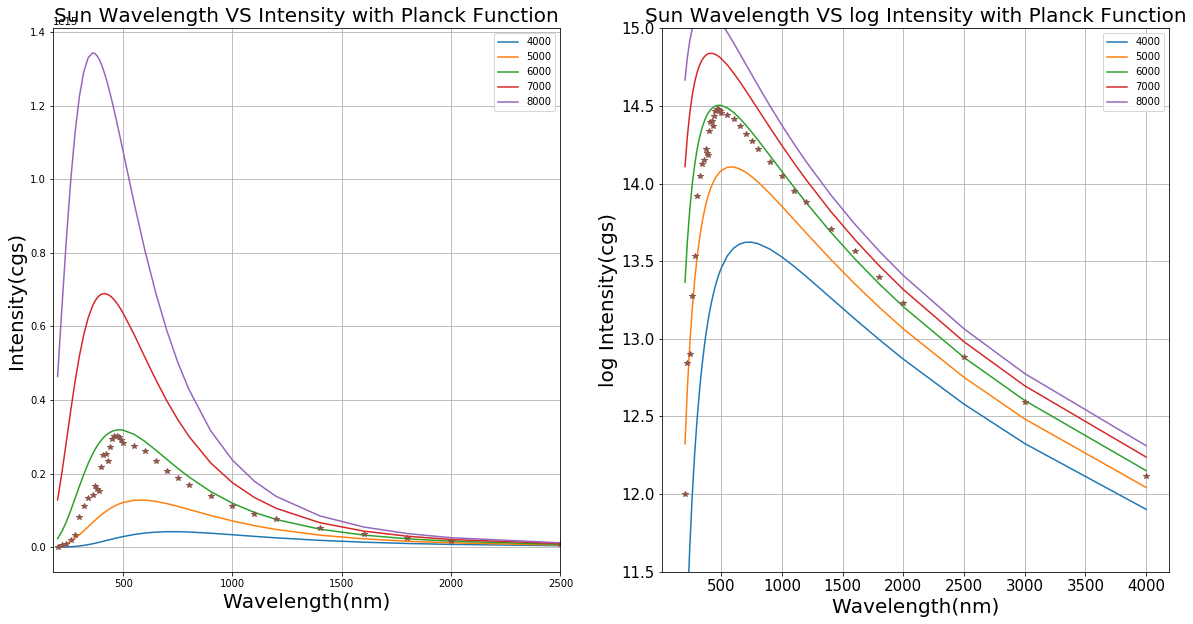

In [5]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(wavelength, planck_result,'-', markersize = 15)
plt.plot(wavelength, intensity,'*')
plt.title('Sun Wavelength VS Intensity with Planck Function',size=20)
plt.ylabel('Intensity(cgs)',size=20)
plt.xlabel('Wavelength(nm)',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.xlim(180,2500)
plt.grid()
labels = (temp)
plt.legend(labels)

plt.subplot(1,2,2)
plt.plot(wavelength, np.log10(planck_result),'-', markersize = 15)
plt.plot(wavelength, np.log10(intensity),'*')
plt.title('Sun Wavelength VS log Intensity with Planck Function',size=20)
plt.ylabel('log Intensity(cgs)',size=20)
plt.xlabel('Wavelength(nm)',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.ylim(11.5,15)
plt.grid()
labels = (temp)
plt.legend(labels)

plt.show()

<div class="alert alert-block alert-success">
    
   - The solar spectrum peaks around 500 nm wavelength. 
   - The solar spectrum has similar shape with the planck function at T = 6000 K. The sun intensity is much lower than planck result before 1250nm wavelength. 
   
   - Next, we calculate the solar temperature via three different methods.

## The Wien Displacement Law: Wien Temperature

- The Wien Displacement Law states: $\lambda_{pk} T = constant$, which means the wavelength of the emission peak of a blackbody $\lambda_{pk}$ decreases with increasing temperature.
- The value of the constant in cgs units is $2.9 * 10^6$ in nm K.

In [6]:
maxvalue = 0
index = 0
for x in range(len(intensity)):
    if (intensity[x] > maxvalue):
        maxvalue = intensity[x]
        index = x

print('The peak is at', wavelength[18],'nm')
max_wavelength = wavelength[18]

The peak is at 460.0 nm


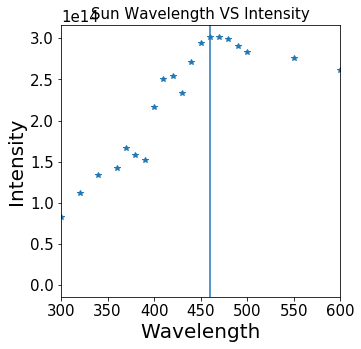

In [7]:
# Wien Temperature
constant = 2.9 * math.pow(10, 6) # nmK
plt.figure(figsize=(5,5))
plt.plot(wavelength, intensity,'*')
plt.title('Sun Wavelength VS Intensity',size=15)
plt.ylabel('Intensity',size=20)
plt.xlabel('Wavelength',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.xlim(300, 600)
plt.axvline(max_wavelength)
plt.show()

The graph shows where is the $\lambda_{pk}$ visually. 

In [8]:
temp_wien = round(constant / max_wavelength)
print(temp_wien)

6304.0


<div class="alert alert-block alert-success">
    <font color = blue>
   - The Wien Result is $T_w$ = 6304 K

## The Slope of the Planck function: Color Temperature

- A thermal radiator of a given temperature will have a unique ratio in brightness between the B and V bands over a wide range of temperatures. 
- Comparing the brightness at two wavelengths to derive a temperature yields a color temperature, $T_{color}$.

In [9]:
# Color temp
bv_wave = np.array([440,550])
temp_range = np.arange(2000, 20000, 500) 
bv_wave_cm = bv_wave * math.pow(10, -7)
Temp, Wave = np.meshgrid(temp_range,bv_wave_cm) 

calc_top = 2*h*c**2
expo = (h*c)/(Wave*k*Temp)
calc_bot = (Wave**5)*(np.exp(expo)-1)
planck_result = calc_top/calc_bot

Bbv = planck_result[0]/planck_result[1]
Sbv = intensity[np.where(wavelength==440)] / intensity[np.where(wavelength==550)]
temp_color = np.interp(Sbv, Bbv, temp_range)
print('The corresponding solar temperature is',temp_color,'K')

The corresponding solar temperature is [5809.34236939] K


<div class="alert alert-block alert-success">
    <font color = blue>
   - The Color Temperature result is $T_{color}$ = 5809 K

## The Stefan-Boltzmann Law and Solar Luminosity: Effective Temperature

- A third way to define the temperature of the sun is to start from its luminosity and radius, both of which can be measured independently of the temperature, and assume it is a perfect thermal radiator such that
$L_{sun} = 4 \pi R_{sun}^2 B_{sun} = 4 \pi R_{sun}^2 \sigma T_{eff}^4$
    - $B_{sun}$ = the surface flux, in units of energy per unit area per unit time, a direct result from integrating the Planck function over all wavelengths
    - $\sigma$ = the Stefan-Boltzmann constant = $5.670*10^{-8} Wm^{-2} K^{-4}$
    
-  First, we are going to calculate the sun luminosity via its observed flux at earth and its distance: $L_{sun} = 4 \pi d_{sun}^2 f_{sun}$
    - $f_{sun} = 1.36 * 103 W m_{-2}$
    - $d_{sun}=1AU=1.50*10_{11} m$
- Second, calculate the sun’s radius, $R_{sun}$ directly from its distance and observed angular size in radians.
    - $\Theta_{sun} = 31.9 degrees = 9.28 * 10^{-3} radians$
    - $R_{sun} = 1⁄2 \Theta_{sun} * d_{sun}$
- Finally, we calculate the sun’s effective temperature $T_{eff}$ from its luminosity and radius.

In [10]:
# Effective Color
solar_constant = 1.36 * math.pow(10, 3) # W/m^2
sun_distance = 1.50 * math.pow(10, 11) # m
sun_luminosity = 4 * math.pi * math.pow(sun_distance, 2) * solar_constant # W

sun_angle = 9.28 * math.pow(10, -3) # radians
sun_radius = 1/2 * sun_angle * sun_distance # m
#print(sun_radius) # m

sb_constant = 5.67 * math.pow(10, -8) # W m^-2 K^-4
temp_eff_pow4 = sun_luminosity / (4 * math.pi * math.pow(sun_radius,2) * sb_constant)
temp_eff = round(math.sqrt(math.sqrt(temp_eff_pow4)))
print('The Effective Temperature is',temp_eff,'K')

The Effective Temperature is 5777 K


<div class="alert alert-block alert-success">
    <font color = blue>
   - The Effective Temperature result is $T_{eff}$ = 5777 K

## Three Temperature compared with Planck

In [11]:
three_temp = np.array([6304,5809,5777])
three_temp_label = np.array(["Wien Temp = 6304K","Color Temp = 5809K","Effective Temp = 5777K"])
wavelength = sun[:,0]
wavelength_cm = wavelength * math.pow(10, -7)
Temp3, Wave3 = np.meshgrid(three_temp,wavelength_cm) 
c1_3 = 2*h*math.pow(c,2)
λ5_3 = np.power(Wave3, 5)
exp_3 = np.exp((h*c)/(Wave3*k*Temp3)) - 1
planck_3 = (c1_3/λ5_3) * (1/exp_3)

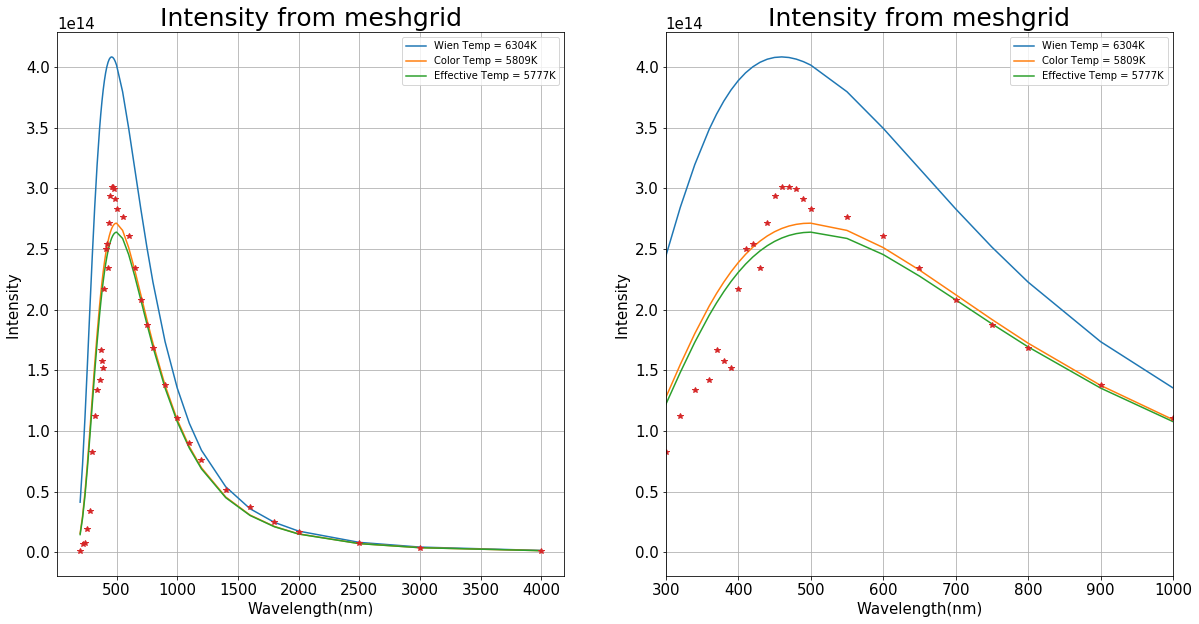

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(wavelength, planck_3,'-', markersize = 15)
plt.plot(wavelength, intensity,'*')
plt.ylabel("Intensity ", size=15)
plt.xlabel("Wavelength(nm)",size=15)
plt.title('Intensity from meshgrid', size = 25)
plt.grid()
labels = (three_temp_label)
plt.legend(labels)

plt.subplot(1,2,2)
plt.plot(wavelength, planck_3,'-', markersize = 15)
plt.plot(wavelength, intensity,'*')
plt.ylabel("Intensity ", size=15)
plt.xlabel("Wavelength(nm)",size=15)
plt.title('Intensity from meshgrid', size = 25)
plt.xlim(300,1000)
plt.grid()
labels = (three_temp_label)
plt.legend(labels)

plt.show()

<div class="alert alert-block alert-success">
    
- Above graphs show the comparsion between the solar spectrum to the Planck Function for the 3 temperatures, $T_w, T_c, T_{eff}$, for wavelength ranges from 300 to 1000 nm and over the over the full range of solar data.

<div class="alert alert-block alert-success">
    
- The three estimates are close to each other in the range of 6000$\pm$304K. Overall, Wien result is higher than color temperature result, which is higher than effective temp result.  Their peaks are around 450nm to 500nm. 
- The most uncertain is the temp result from Wien function that is have higher intensity than rest. It is caused by the percision of sun.txt data which records the intensity at wavelength interval $0.1*10^2$. The max intensity might be somewhere between our dataset's intervals, which lead to the uncertainy in our graph. 

<div class="alert alert-block alert-success">
    
- Over a brand range of wavelengths, the solar spectrum has similar shape with a thermal radiator, however, the peak of solar spectrum is higher than a thermal radiator. Also, in the short wavelength range, the solar spectrum is a little offset than thermal radiators.
- Over the visible spectrum, the solor spectrum follows very similar path as a thermal radiator after wavelength = 600nm. Before it, the spectrum has similar trend but more fluctuations from a thermal radiator. 

<div class="alert alert-block alert-success">
    
- I think the sun is a thermal radiator. The offset can be explained as the measurements of solar radiation are made at the earth instead of at the surface of the sun. So the intensity is lower compared to Planck function. Moreover, the sun's radiation has to pass through the earth's atmosphere before reaching the surface which slightly reduces its intensity.